In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_csv('UCI_Credit_Card.csv')

In [97]:
print(df.shape)
pd.set_option('display.max_columns',25)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [98]:
df1=df.copy()
df1.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [99]:
df1=df1.drop(['ID'],axis=1)

In [100]:
df1['EDUCATION'] = df1['EDUCATION'].replace({0: 4, 4: 4, 5: 4, 6: 4})
df1['MARRIAGE']=df1['MARRIAGE'].replace({3: 0})
df1.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [101]:
df1.iloc[:,11:18]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1
0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0
...,...,...,...,...,...,...,...
29995,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0
29996,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0
29997,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0
29998,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0


In [119]:
df1["TOTAL_BILL"]=(df1.iloc[:,11:17]).sum(axis=1)
df1["TOTAL_PAY"]=(df1.iloc[:,17:23]).sum(axis=1)
df1["PAY_TO_BAL_RATIO"]=df1.TOTAL_PAY/df1.TOTAL_BILL

In [120]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,TOTAL_BILL,TOTAL_PAY,PAY_TO_BAL_RATIO
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,0.089434
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,0.292791
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,0.108388
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,0.036259
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,0.540054


In [128]:
df1.PAY_TO_BAL_RATIO.describe()

count    30000.000000
mean         0.380941
std          7.671004
min       -546.928571
25%          0.040952
50%          0.084932
75%          0.586922
max        797.000000
Name: PAY_TO_BAL_RATIO, dtype: float64

In [129]:
df1.PAY_TO_BAL_RATIO.isna().sum()

0

In [126]:
df1.PAY_TO_BAL_RATIO.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.PAY_TO_BAL_RATIO=df1.PAY_TO_BAL_RATIO.fillna(0)

In [131]:
#changing column data types
for col in ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
    df1[col]=df1[col].astype('category')

In [132]:
df1.dtypes

LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_1                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default.payment.next.month       int64
TOTAL_BILL                     float64
TOTAL_PAY                

In [133]:
df_lgr=df1.copy()

In [238]:
df1.to_csv("Credit_default_modified.csv")

In [134]:
float_columns = df_lgr.select_dtypes(include=['float64']).columns
df_lgr[float_columns]

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TOTAL_BILL,TOTAL_PAY,PAY_TO_BAL_RATIO
0,20000.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,7704.0,689.0,0.089434
1,120000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,17077.0,5000.0,0.292791
2,90000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,101653.0,11018.0,0.108388
3,50000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,231334.0,8388.0,0.036259
4,50000.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,109339.0,59049.0,0.540054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,725349.0,42550.0,0.058661
29996,150000.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,21182.0,14490.0,0.684071
29997,30000.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,70496.0,31300.0,0.443997
29998,80000.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,266611.0,147181.0,0.552044


# LOGISTIC REGRESSION ON SCALED DATA

In [137]:
from sklearn.preprocessing import StandardScaler

float_columns = df_lgr.select_dtypes(include=['float64']).columns

#Applying StandardScaler to float columns
scaler = StandardScaler()
df_lgr[float_columns] = scaler.fit_transform(df_lgr[float_columns])

categorical_columns = ['SEX','MARRIAGE']

#Applying one-hot encoding to categorical columns
#df_lgr = pd.get_dummies(df_lgr, columns=categorical_columns, drop_first=True)

In [138]:
pd.set_option('display.max_columns',80)
df_lgr.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,TOTAL_BILL,TOTAL_PAY,PAY_TO_BAL_RATIO
0,-1.136720,2,2,1,24,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,-0.690692,-0.509027,-0.038002
1,-0.365981,2,2,2,26,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,-0.665997,-0.438153,-0.011491
2,-0.597202,2,2,2,34,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,-0.443170,-0.339216,-0.035531
3,-0.905498,2,2,1,37,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,-0.101507,-0.382454,-0.044934
4,-0.905498,1,2,1,57,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,-0.422920,0.450421,0.020743


In [220]:
X=df_lgr.drop('default.payment.next.month',axis=1)
y=df_lgr['default.payment.next.month']

In [221]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   LIMIT_BAL         30000 non-null  float64 
 1   SEX               30000 non-null  category
 2   EDUCATION         30000 non-null  category
 3   MARRIAGE          30000 non-null  category
 4   AGE               30000 non-null  int64   
 5   PAY_1             30000 non-null  category
 6   PAY_2             30000 non-null  category
 7   PAY_3             30000 non-null  category
 8   PAY_4             30000 non-null  category
 9   PAY_5             30000 non-null  category
 10  PAY_6             30000 non-null  category
 11  BILL_AMT1         30000 non-null  float64 
 12  BILL_AMT2         30000 non-null  float64 
 13  BILL_AMT3         30000 non-null  float64 
 14  BILL_AMT4         30000 non-null  float64 
 15  BILL_AMT5         30000 non-null  float64 
 16  BILL_AMT6         3000

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_lgr = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lgr)
precision = precision_score(y_test, y_pred_lgr)
f1 = f1_score(y_test, y_pred_lgr)
recall = recall_score(y_test, y_pred_lgr)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8107
Precision: 0.6980
F1 Score: 0.3545
Recall: 0.2376


In [143]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, make_scorer

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated predictions
y_pred = cross_val_predict(model, X, y, cv=cv, method='predict')
y_pred_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

# Calculate cross-validated metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
f1 = f1_score(y, y_pred)
recall = recall_score(y, y_pred)
auc = roc_auc_score(y, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8106
Precision: 0.7132
F1 Score: 0.3594
Recall: 0.2402
AUC: 0.7229


In [144]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga', 'liblinear'],
    'l1_ratio': [0, 0.5, 1]  # l1_ratio is only used if penalty is 'elasticnet'
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X, y)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Cross-validated predictions with the best model
best_model = grid_search.best_estimator_
y_pred = cross_val_predict(best_model, X, y, cv=cv, method='predict')
y_pred_proba = cross_val_predict(best_model, X, y, cv=cv, method='predict_proba')[:, 1]

# Calculate cross-validated metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
f1 = f1_score(y, y_pred)
recall = recall_score(y, y_pred)
auc = roc_auc_score(y, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Best parameters found: {'C': 0.01, 'l1_ratio': 0, 'penalty': 'none', 'solver': 'lbfgs'}
Accuracy: 0.8104
Precision: 0.7120
F1 Score: 0.3586
Recall: 0.2396
AUC: 0.7230


In [226]:
best_model=LogisticRegression(C= 0.01, l1_ratio= 0, penalty='none', solver='lbfgs')
best_model.fit(X_train,y_train)

LogisticRegression(C=0.01, l1_ratio=0, penalty='none')

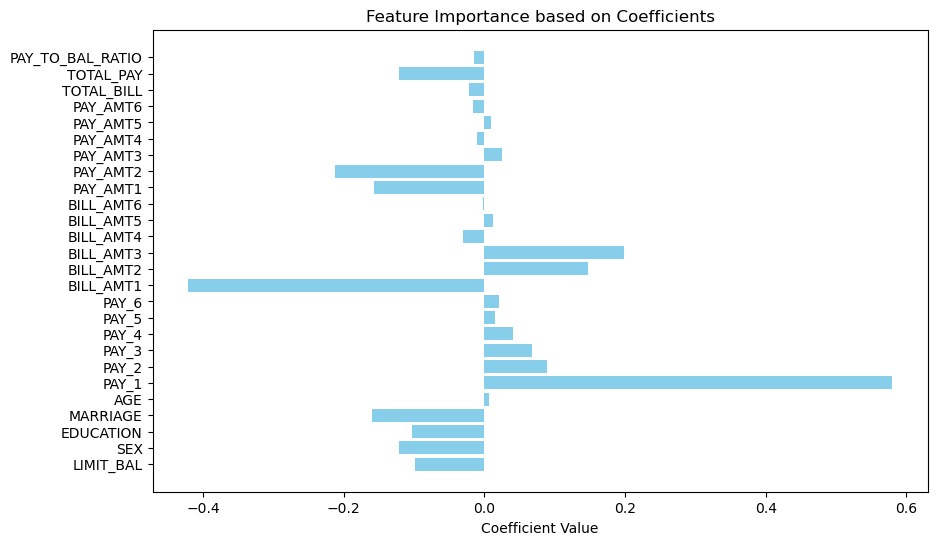

In [232]:
coefficients = best_model.coef_[0]
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Coefficients')
plt.show()

RESULT

# LOGISTIC REGRESSION ON SCALED DATA WITH SMOTE

In [204]:
X=df_lgr.drop('default.payment.next.month',axis=1)
y=df_lgr['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TOTAL_BILL,TOTAL_PAY,PAY_TO_BAL_RATIO
0,-1.136720,2,2,1,24,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.690692,-0.509027,-0.038002
1,-0.365981,2,2,2,26,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.665997,-0.438153,-0.011491
2,-0.597202,2,2,2,34,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.443170,-0.339216,-0.035531
3,-0.905498,2,2,1,37,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.101507,-0.382454,-0.044934
4,-0.905498,1,2,1,57,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.422920,0.450421,0.020743


In [194]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[1,2,3,5,6,7,8,9,10])
X_smotenc, y_smotenc = sm.fit_resample(X_train, y_train)

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

model = LogisticRegression()
model.fit(X_smotenc, y_smotenc)

# Make predictions
y_pred_lgr_smote = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lgr_smote)
precision = precision_score(y_test, y_pred_lgr_smote)
f1 = f1_score(y_test, y_pred_lgr_smote)
recall = recall_score(y_test, y_pred_lgr_smote)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.6688
Precision: 0.3624
F1 Score: 0.4720
Recall: 0.6763


In [203]:
model = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga', 'liblinear'],
    'l1_ratio': [0, 0.5, 1]  # l1_ratio is only used if penalty is 'elasticnet'
}

# Filter out incompatible combinations of parameters
filtered_param_grid = {
    'penalty': ['l1', 'l2'],  # Only include compatible penalties for logistic regression solvers
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0, 0.5, 1]  # l1_ratio is only used if penalty is 'elasticnet'
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=filtered_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_smotenc, y_smotenc)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Fit the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Best parameters found: {'C': 100, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.6693
Precision: 0.3630
F1 Score: 0.4726
Recall: 0.6771
AUC: 0.7334


In [234]:
best_model_smote=LogisticRegression(C=100, l1_ratio=0, penalty='l2', solver='liblinear')
best_model_smote.fit(X_smotenc,y_smotenc)

LogisticRegression(C=100, l1_ratio=0, solver='liblinear')

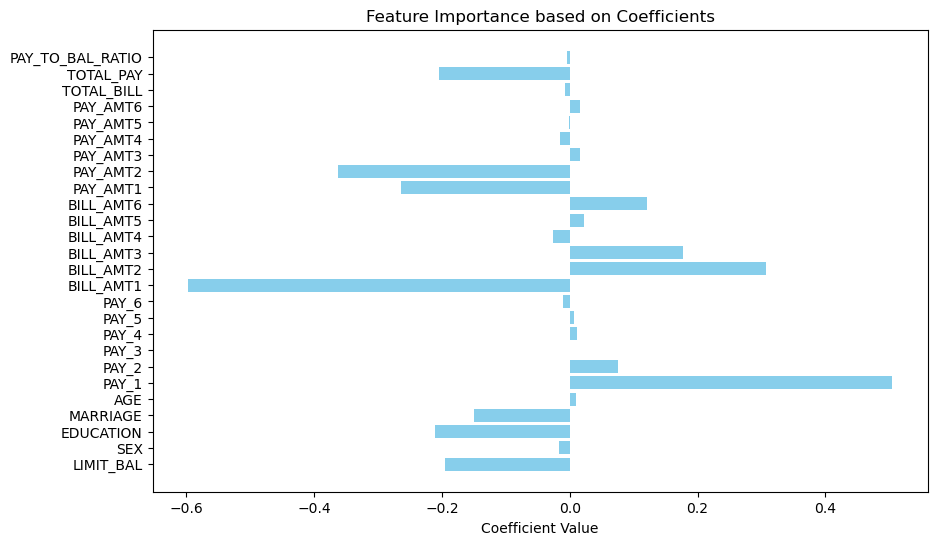

In [235]:
coefficients = best_model_smote.coef_[0]
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Coefficients')
plt.show()

RESULTS

# LOGISTIC REGRESSION ON SCALED DATA WITH SMOTE & ENCODING


In [206]:
df_enc=df_lgr.copy()

In [207]:
df_enc

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,TOTAL_BILL,TOTAL_PAY,PAY_TO_BAL_RATIO
0,-1.136720,2,2,1,24,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,-0.690692,-0.509027,-0.038002
1,-0.365981,2,2,2,26,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,-0.665997,-0.438153,-0.011491
2,-0.597202,2,2,2,34,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,-0.443170,-0.339216,-0.035531
3,-0.905498,2,2,1,37,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,-0.101507,-0.382454,-0.044934
4,-0.905498,1,2,1,57,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,-0.422920,0.450421,0.020743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,1,3,1,39,0,0,0,0,0,0,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0,1.200047,0.179175,-0.042013
29996,-0.134759,1,3,2,43,-1,-1,-1,-1,0,0,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0,-0.655182,-0.282136,0.039517
29997,-1.059646,1,2,2,37,4,3,2,-1,0,0,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1,-0.525257,-0.005777,0.008220
29998,-0.674276,1,3,1,41,1,-1,0,0,0,-1,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1,-0.008564,1.899325,0.022306


In [213]:
cols_for_encoding=['SEX','MARRIAGE']
one_hot_encoded_data = pd.get_dummies(df_enc, columns = cols_for_encoding)
one_hot_encoded_data.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,TOTAL_BILL,TOTAL_PAY,PAY_TO_BAL_RATIO,SEX_1,SEX_2,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2
0,-1.136720,2,24,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,-0.690692,-0.509027,-0.038002,0,1,0,1,0
1,-0.365981,2,26,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,-0.665997,-0.438153,-0.011491,0,1,0,0,1
2,-0.597202,2,34,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,-0.443170,-0.339216,-0.035531,0,1,0,0,1
3,-0.905498,2,37,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,-0.101507,-0.382454,-0.044934,0,1,0,1,0
4,-0.905498,2,57,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,-0.422920,0.450421,0.020743,1,0,0,1,0


In [219]:
#doesn't improve much after using one hot encoding